In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re 
from wordcloud import WordCloud
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential 
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split 

%matplotlib inline
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score


# Fake news

In [2]:
fake = pd.read_csv('Fake.csv')
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [3]:
fake.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [4]:
# counting by subject 
fake['subject'].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

<AxesSubplot:xlabel='subject', ylabel='count'>

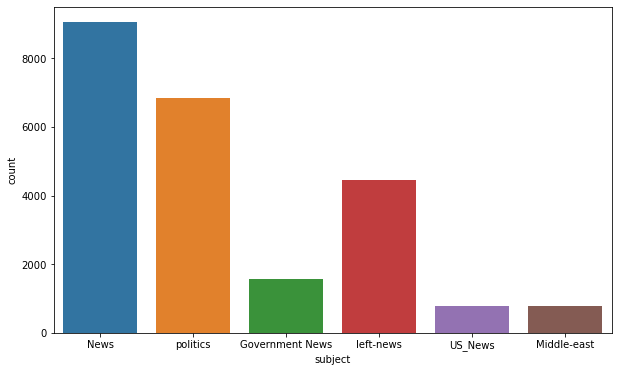

In [5]:
plt.figure(figsize=(10,6))
sns.countplot("subject", data=fake)

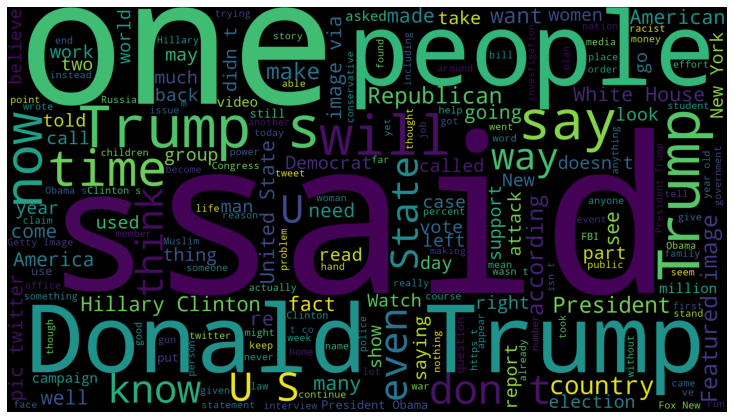

In [6]:
# Word cloud 

text =' '.join(fake['text'].tolist())


wordcloud = WordCloud(width=1920, height=1080).generate(text)
fig = plt.figure(figsize = (10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Real news

In [7]:
real = pd.read_csv('True.csv')
real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [8]:
# counting by subject 
real['subject'].value_counts()

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

<AxesSubplot:xlabel='subject', ylabel='count'>

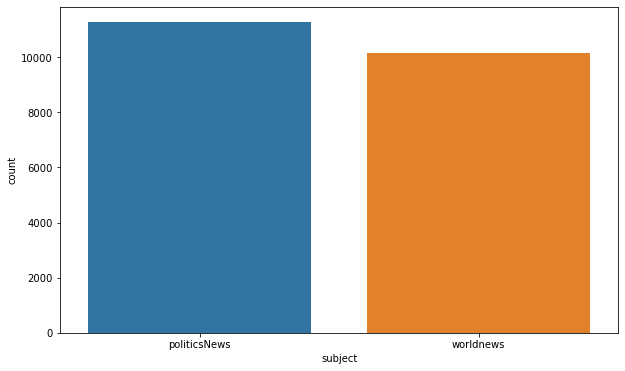

In [9]:
plt.figure(figsize=(10,6))
sns.countplot("subject", data=real)

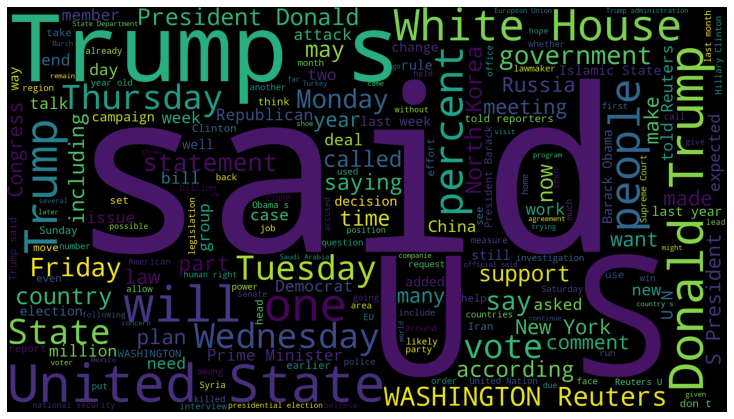

In [10]:
# Word cloud 

text =' '.join(real['text'].tolist())


wordcloud = WordCloud(width=1920, height=1080).generate(text)
fig = plt.figure(figsize = (10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [11]:
# creating a list of index that don't have the publiction part 
unknow_publishers = []
for index, row in enumerate(real.text.values):
    try:
# if it doesn't have - it will create an error and if it's longer than 260 it will create an error, in both situations the 
# error means that there's no publisher that's why we appended it it the exception to no_publishers list
        record = row.split("-", maxsplit = 1)
        record[1]
        # is it twitter news ?
        assert(len(record[0]) < 120)
    
    except:
        unknow_publishers.append(index)
        
len(unknow_publishers)

222

In [12]:
unknow_publishers

[7,
 8,
 12,
 13,
 14,
 17,
 27,
 40,
 67,
 70,
 97,
 122,
 140,
 155,
 156,
 192,
 222,
 233,
 252,
 257,
 284,
 308,
 321,
 362,
 384,
 412,
 453,
 459,
 495,
 531,
 838,
 851,
 1076,
 1081,
 1112,
 1146,
 1179,
 1341,
 1381,
 1451,
 1509,
 1522,
 1523,
 1539,
 1570,
 1611,
 1645,
 1657,
 1659,
 1696,
 1711,
 1726,
 1730,
 1748,
 1768,
 1824,
 1826,
 1878,
 1885,
 1932,
 1952,
 1967,
 2012,
 2023,
 2056,
 2087,
 2100,
 2102,
 2120,
 2140,
 2171,
 2187,
 2247,
 2262,
 2275,
 2313,
 2315,
 2355,
 2383,
 2392,
 2442,
 2486,
 2510,
 2518,
 2557,
 2602,
 2658,
 2776,
 2811,
 2855,
 2885,
 2922,
 3107,
 3248,
 3270,
 3466,
 3488,
 3597,
 3615,
 3782,
 3835,
 3930,
 3944,
 3976,
 4170,
 4198,
 4206,
 4307,
 4358,
 4465,
 4554,
 4753,
 5246,
 5290,
 5316,
 5379,
 5380,
 5412,
 5504,
 5538,
 5588,
 5593,
 5633,
 5761,
 5784,
 5794,
 5796,
 5823,
 5866,
 5997,
 6026,
 6065,
 6075,
 6524,
 6573,
 6660,
 6823,
 7259,
 7353,
 7463,
 7568,
 7715,
 7766,
 7816,
 7890,
 7915,
 7922,
 8118,
 8127,
 8

In [13]:
# getting the text data of unknow_publishers
real.iloc[unknow_publishers].text

7        The following statements were posted to the ve...
8        The following statements were posted to the ve...
12       The following statements were posted to the ve...
13       The following statements were posted to the ve...
14        (In Dec. 25 story, in second paragraph, corre...
                               ...                        
20135     (Story corrects to million from billion in pa...
20500     (This Sept 8 story corrects headline, clarifi...
20667     (Story refiles to add dropped word  not , in ...
21246     (Story corrects third paragraph to show Mosul...
21339     (Story corrects to fix spelling in paragraph ...
Name: text, Length: 222, dtype: object

In [14]:
real.iloc[8970]

title      Graphic: Supreme Court roundup
text                                     
subject                      politicsNews
date                       June 16, 2016 
Name: 8970, dtype: object

In [15]:
real.drop(8970, axis=0)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [16]:
# now we create an array with all the publishers names 
publishers = []
tmp_text = []

for index, row in enumerate (real.text.values):
    if index in unknow_publishers:
        tmp_text.append(row)
        publishers.append('unknown')
    else:
        record= row.split("-", maxsplit=1)
        publishers.append(record[0].strip())
        tmp_text.append(record[1].strip)

In [17]:
real['publisher']=publishers
real['text'] = tmp_text

real.head()

,title,text,subject,date,publisher
0,"As U.S. budget fight looms, Republicans flip t...",<built-in method strip of str object at 0x0000...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
1,U.S. military to accept transgender recruits o...,<built-in method strip of str object at 0x0000...,politicsNews,"December 29, 2017",WASHINGTON (Reuters)
2,Senior U.S. Republican senator: 'Let Mr. Muell...,<built-in method strip of str object at 0x0000...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
3,FBI Russia probe helped by Australian diplomat...,<built-in method strip of str object at 0x0000...,politicsNews,"December 30, 2017",WASHINGTON (Reuters)
4,Trump wants Postal Service to charge 'much mor...,<built-in method strip of str object at 0x0000...,politicsNews,"December 29, 2017",SEATTLE/WASHINGTON (Reuters)


In [18]:
real.shape

(21417, 5)

In [19]:
empty_fake_index = [index for index,text in enumerate(fake.text.tolist()) if str(text).strip()==""]

In [20]:
#to get the text 
fake.iloc[empty_fake_index]

,title,text,subject,date
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017"
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017"
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017"
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017"
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017"
...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"


In [21]:
real["text"] = real['title'].astype(str) +' '+ real['text'].astype(str)
fake["text"] = fake['title'].astype(str) +" " + fake["text"].astype(str)
print(real)

                                                   title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
21412  'Fully committed' NATO backs new U.S. approach...   
21413  LexisNexis withdrew two products from Chinese ...   
21414  Minsk cultural hub becomes haven from authorities   
21415  Vatican upbeat on possibility of Pope Francis ...   
21416  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text       subject  \
0      As U.S. budget fight looms, Republicans flip t...  politicsNews   
1      U.S. military to accept transgender recruits o...  politicsNews   
2      Senior U.S. Republican senator: 'Let Mr. Muell... 

# Converting to lower case characters 

In [22]:
real['text'] = real['text'].apply(lambda x : str(x).lower())
fake['text'] = fake['text'].apply(lambda x : str(x).lower())

# Preprocessing 

In [23]:
real['class']=1
fake['class']=0
real

,title,text,subject,date,publisher,class
0,"As U.S. budget fight looms, Republicans flip t...","as u.s. budget fight looms, republicans flip t...",politicsNews,"December 31, 2017",WASHINGTON (Reuters),1
1,U.S. military to accept transgender recruits o...,u.s. military to accept transgender recruits o...,politicsNews,"December 29, 2017",WASHINGTON (Reuters),1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,senior u.s. republican senator: 'let mr. muell...,politicsNews,"December 31, 2017",WASHINGTON (Reuters),1
3,FBI Russia probe helped by Australian diplomat...,fbi russia probe helped by australian diplomat...,politicsNews,"December 30, 2017",WASHINGTON (Reuters),1
4,Trump wants Postal Service to charge 'much mor...,trump wants postal service to charge 'much mor...,politicsNews,"December 29, 2017",SEATTLE/WASHINGTON (Reuters),1
...,...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,'fully committed' nato backs new u.s. approach...,worldnews,"August 22, 2017",BRUSSELS (Reuters),1
21413,LexisNexis withdrew two products from Chinese ...,lexisnexis withdrew two products from chinese ...,worldnews,"August 22, 2017",LONDON (Reuters),1
21414,Minsk cultural hub becomes haven from authorities,minsk cultural hub becomes haven from authorit...,worldnews,"August 22, 2017",MINSK (Reuters),1
21415,Vatican upbeat on possibility of Pope Francis ...,vatican upbeat on possibility of pope francis ...,worldnews,"August 22, 2017",MOSCOW (Reuters),1


In [24]:
real = real[['text','class']]
fake = fake[['text','class']]

In [25]:
data =real.append(fake, ignore_index = True)

In [26]:
data.sample(5)

,text,class
7646,plane carrying vp candidate pence skids off ny...,1
37762,democrat clerk claims election “not rigged” bu...,0
36092,taxpayer funded left-wing church organization ...,0
26247,maine gov. lepage says he’s ‘tired of being c...,0
29806,cliven bundy takes charge of remaining oregon...,0


In [27]:
import preprocess_kgptalkie as ps
import spacy
from bs4 import BeautifulSoup
import textblob

# Remove special characters -- preprocess_kgptalkie library

In [28]:
data['text'] = data['text'].apply(lambda x: ps.remove_special_chars(x))

# Vectorization -- Word2Vec

In [29]:
import gensim 

In [30]:
y = data['class'].values
X = [d.split() for d in data['text'].tolist()]
X

[['as',
  'us',
  'budget',
  'fight',
  'looms',
  'republicans',
  'flip',
  'their',
  'fiscal',
  'script',
  'builtin',
  'method',
  'strip',
  'of',
  'str',
  'object',
  'at',
  '0x0000021c038edfb0'],
 ['us',
  'military',
  'to',
  'accept',
  'transgender',
  'recruits',
  'on',
  'monday',
  'pentagon',
  'builtin',
  'method',
  'strip',
  'of',
  'str',
  'object',
  'at',
  '0x0000021c09b9efc0'],
 ['senior',
  'us',
  'republican',
  'senator',
  'let',
  'mr',
  'mueller',
  'do',
  'his',
  'job',
  'builtin',
  'method',
  'strip',
  'of',
  'str',
  'object',
  'at',
  '0x0000021c0adc2720'],
 ['fbi',
  'russia',
  'probe',
  'helped',
  'by',
  'australian',
  'diplomat',
  'tipoff',
  'nyt',
  'builtin',
  'method',
  'strip',
  'of',
  'str',
  'object',
  'at',
  '0x0000021c0ab6c500'],
 ['trump',
  'wants',
  'postal',
  'service',
  'to',
  'charge',
  'much',
  'more',
  'for',
  'amazon',
  'shipments',
  'builtin',
  'method',
  'strip',
  'of',
  'str',
  'ob

In [31]:
# we have created a list of lists -- a list inside of a list 
type(X)
type(X[0])

list

In [32]:
print(X[0])

['as', 'us', 'budget', 'fight', 'looms', 'republicans', 'flip', 'their', 'fiscal', 'script', 'builtin', 'method', 'strip', 'of', 'str', 'object', 'at', '0x0000021c038edfb0']


In [33]:
# 
DIM =100
w2v_model = gensim.models.Word2Vec(X, vector_size  = DIM, window = 10, min_count=1)

In [34]:
len(w2v_model.wv)

214703

In [35]:
w2v_model.wv.key_to_index
#Use KeyedVector's .key_to_index dict, .index_to_key list, and methods 
#.get_vecattr(key, attr) and .set_vecattr(key, attr, new_val) instead.

{'the': 0,
 'to': 1,
 'of': 2,
 'and': 3,
 'a': 4,
 'in': 5,
 'that': 6,
 's': 7,
 'is': 8,
 'for': 9,
 'on': 10,
 'trump': 11,
 'it': 12,
 'he': 13,
 'was': 14,
 'with': 15,
 'at': 16,
 'his': 17,
 'as': 18,
 'this': 19,
 'be': 20,
 'by': 21,
 'are': 22,
 'not': 23,
 'have': 24,
 'they': 25,
 'who': 26,
 'has': 27,
 'i': 28,
 'from': 29,
 'you': 30,
 't': 31,
 'we': 32,
 'an': 33,
 'about': 34,
 'but': 35,
 'said': 36,
 'their': 37,
 'us': 38,
 'president': 39,
 'people': 40,
 'her': 41,
 'she': 42,
 'will': 43,
 'or': 44,
 'what': 45,
 'all': 46,
 'out': 47,
 'would': 48,
 'one': 49,
 'been': 50,
 'more': 51,
 'if': 52,
 'were': 53,
 'when': 54,
 'just': 55,
 'strip': 56,
 'object': 57,
 'method': 58,
 'builtin': 59,
 'str': 60,
 'had': 61,
 'our': 62,
 'obama': 63,
 'clinton': 64,
 'after': 65,
 'so': 66,
 'can': 67,
 'up': 68,
 'no': 69,
 'there': 70,
 'donald': 71,
 'like': 72,
 'which': 73,
 'him': 74,
 'video': 75,
 'new': 76,
 'over': 77,
 'because': 78,
 'do': 79,
 'also': 80,

In [36]:
w2v_model.wv['china']

array([ 1.653098  ,  3.5127096 ,  0.34578836,  0.20058286,  2.2837012 ,
       -1.9177256 , -2.8335922 ,  0.5921709 ,  1.6686187 , -1.7740147 ,
        3.4267204 , -3.5558028 , -1.1438731 , -1.3222917 , -0.30133593,
       -4.412496  , -2.6393554 , -1.6856773 , -0.29618984, -0.42347914,
       -2.4715605 , -0.02186926, -0.41679624, -1.9806641 , -0.58156323,
       -1.0869956 ,  2.6028411 ,  2.6984074 ,  1.0429001 ,  0.44937593,
       -1.3361088 ,  2.5252595 ,  1.6415894 ,  1.348003  , -2.3931124 ,
        0.75480425,  0.11030952,  3.931742  , -1.3897548 , -0.031477  ,
       -0.35481328, -1.0384549 , -0.5129544 ,  0.63992584, -2.234681  ,
        4.9271398 ,  1.0737616 , -1.2733724 , -2.1481009 , -0.03854983,
       -2.1139526 , -1.6350136 ,  0.08835534,  1.8873627 , -2.1896198 ,
        1.4387314 , -3.4642386 ,  0.5288449 , -0.69261944, -0.54520905,
        2.029195  ,  1.4382772 ,  2.5651855 , -1.3592817 , -3.7109141 ,
       -2.623475  ,  1.7575276 ,  0.30334255, -0.49237573,  3.89

In [37]:
w2v_model.wv.most_similar('china')

[('japan', 0.7994164824485779),
 ('nafta', 0.7646333575248718),
 ('pyongyang', 0.7618939876556396),
 ('philippines', 0.7246823310852051),
 ('chinese', 0.7036981582641602),
 ('india', 0.6882413029670715),
 ('chinas', 0.6865416169166565),
 ('nato', 0.6851727962493896),
 ('missile', 0.6843124628067017),
 ('xi', 0.6786450147628784)]

In [38]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
X

[['as',
  'us',
  'budget',
  'fight',
  'looms',
  'republicans',
  'flip',
  'their',
  'fiscal',
  'script',
  'builtin',
  'method',
  'strip',
  'of',
  'str',
  'object',
  'at',
  '0x0000021c038edfb0'],
 ['us',
  'military',
  'to',
  'accept',
  'transgender',
  'recruits',
  'on',
  'monday',
  'pentagon',
  'builtin',
  'method',
  'strip',
  'of',
  'str',
  'object',
  'at',
  '0x0000021c09b9efc0'],
 ['senior',
  'us',
  'republican',
  'senator',
  'let',
  'mr',
  'mueller',
  'do',
  'his',
  'job',
  'builtin',
  'method',
  'strip',
  'of',
  'str',
  'object',
  'at',
  '0x0000021c0adc2720'],
 ['fbi',
  'russia',
  'probe',
  'helped',
  'by',
  'australian',
  'diplomat',
  'tipoff',
  'nyt',
  'builtin',
  'method',
  'strip',
  'of',
  'str',
  'object',
  'at',
  '0x0000021c0ab6c500'],
 ['trump',
  'wants',
  'postal',
  'service',
  'to',
  'charge',
  'much',
  'more',
  'for',
  'amazon',
  'shipments',
  'builtin',
  'method',
  'strip',
  'of',
  'str',
  'ob

In [39]:
X = tokenizer.texts_to_sequences(X)
X

[[19,
  39,
  1058,
  494,
  9146,
  154,
  6546,
  38,
  3117,
  3576,
  60,
  59,
  57,
  3,
  61,
  58,
  17,
  108553],
 [39,
  281,
  2,
  1450,
  1389,
  10965,
  11,
  568,
  1661,
  60,
  59,
  57,
  3,
  61,
  58,
  17,
  108554],
 [806,
  39,
  114,
  334,
  263,
  325,
  1279,
  80,
  18,
  382,
  60,
  59,
  57,
  3,
  61,
  58,
  17,
  108555],
 [180,
  175,
  1338,
  1082,
  22,
  4707,
  4941,
  21340,
  4192,
  60,
  59,
  57,
  3,
  61,
  58,
  17,
  108556],
 [12,
  402,
  6833,
  524,
  2,
  1128,
  165,
  52,
  10,
  3568,
  10966,
  60,
  59,
  57,
  3,
  61,
  58,
  17,
  108557],
 [85,
  95,
  278,
  4993,
  10,
  1223,
  11,
  1161,
  366,
  60,
  59,
  57,
  3,
  61,
  58,
  17,
  108558],
 [12,
  111,
  175,
  1338,
  44,
  21,
  1084,
  36,
  4350,
  2816,
  4192,
  60,
  59,
  57,
  3,
  61,
  58,
  17,
  108559],
 [2664,
  12,
  11,
  219,
  3474,
  1141,
  1619,
  2720,
  3568,
  1,
  438,
  7677,
  672,
  2,
  1,
  4381,
  219,
  1616,
  3,
  39,
  40,
  

In [40]:
# the indecies here start from 1 
tokenizer.word_index

{'the': 1,
 'to': 2,
 'of': 3,
 'and': 4,
 'a': 5,
 'in': 6,
 'that': 7,
 's': 8,
 'is': 9,
 'for': 10,
 'on': 11,
 'trump': 12,
 'it': 13,
 'he': 14,
 'was': 15,
 'with': 16,
 'at': 17,
 'his': 18,
 'as': 19,
 'this': 20,
 'be': 21,
 'by': 22,
 'are': 23,
 'not': 24,
 'have': 25,
 'they': 26,
 'who': 27,
 'has': 28,
 'i': 29,
 'from': 30,
 'you': 31,
 't': 32,
 'we': 33,
 'an': 34,
 'about': 35,
 'but': 36,
 'said': 37,
 'their': 38,
 'us': 39,
 'president': 40,
 'people': 41,
 'her': 42,
 'she': 43,
 'will': 44,
 'or': 45,
 'what': 46,
 'all': 47,
 'out': 48,
 'would': 49,
 'one': 50,
 'been': 51,
 'more': 52,
 'if': 53,
 'were': 54,
 'when': 55,
 'just': 56,
 'strip': 57,
 'object': 58,
 'method': 59,
 'builtin': 60,
 'str': 61,
 'had': 62,
 'our': 63,
 'obama': 64,
 'clinton': 65,
 'after': 66,
 'so': 67,
 'can': 68,
 'up': 69,
 'no': 70,
 'there': 71,
 'donald': 72,
 'like': 73,
 'which': 74,
 'him': 75,
 'video': 76,
 'new': 77,
 'over': 78,
 'because': 79,
 'do': 80,
 'also': 81

# histogram of total number of words used in our news 

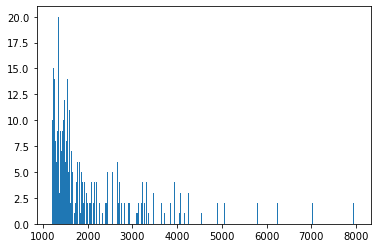

In [41]:
plt.hist([len(x) for x in X], bins = 700, range=[1200 , 8000])
plt.show()

In [42]:
# number of news that has greater than 1000 words 
nos = np.array([len(x) for x in X])
len(nos[nos > 1000])

1054

In [43]:
# When the sequence is more than 1000 then it is truncated, when it less 0 is added which mean that it is the padding 
maxlen = 1000
X = pad_sequences(X, maxlen = maxlen)
X

array([[     0,      0,      0, ...,     58,     17, 108553],
       [     0,      0,      0, ...,     58,     17, 108554],
       [     0,      0,      0, ...,     58,     17, 108555],
       ...,
       [     2,   1265,     10, ...,    531,    357,   1594],
       [     0,      0,      0, ...,    531,   4463,    198],
       [     0,      0,      0, ...,    531,    491,   1594]])

In [44]:
# when you check the length of any index of x it is always 1000
len(X[0])

1000

In [45]:
vocab_size = len(tokenizer.word_index) + 1
vocab = tokenizer.word_index

In [46]:
def get_weight_matrix(model):
    
    weight_matrix = np.zeros((vocab_size, DIM))
        
    for word, i in vocab.items():
        weight_matrix[i] = model.wv[word]
    
    return weight_matrix



In [47]:
embedding_vectors = get_weight_matrix(w2v_model)

embedding_vectors.shape

(214704, 100)

# Creating our machine learning model

In [48]:
model = Sequential()
model.add(Embedding(vocab_size, output_dim=DIM, weights = [embedding_vectors], input_length = maxlen , trainable = False))
model.add(LSTM(units=128))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['acc'])

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 100)         21470400  
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 21,587,777
Trainable params: 117,377
Non-trainable params: 21,470,400
_________________________________________________________________


# Split to train and test 

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [51]:
model.fit(X_train, y_train, validation_split =0.3, epochs=6)

Epoch 1/6
737/737 [==============================] - 1649s 2s/step - loss: 0.0197 - acc: 0.9948 - val_loss: 0.0133 - val_acc: 0.9971
Epoch 2/6
737/737 [==============================] - 1200s 2s/step - loss: 0.0088 - acc: 0.9972 - val_loss: 0.0103 - val_acc: 0.9972
Epoch 3/6
737/737 [==============================] - 1108s 2s/step - loss: 0.0048 - acc: 0.9979 - val_loss: 0.0095 - val_acc: 0.9972
Epoch 4/6
737/737 [==============================] - 1085s 1s/step - loss: 0.0026 - acc: 0.9992 - val_loss: 0.0124 - val_acc: 0.9974
Epoch 5/6
737/737 [==============================] - 1855s 3s/step - loss: 0.0014 - acc: 0.9995 - val_loss: 0.0113 - val_acc: 0.9975
Epoch 6/6
737/737 [==============================] - 1200s 2s/step - loss: 3.7307e-04 - acc: 1.0000 - val_loss: 0.0140 - val_acc: 0.9975


In [55]:
# test
y_pred = (model.predict(X_test) >= 0.5).astype(int)

351/351 [==============================] - 283s 799ms/step


In [56]:
accuracy_score(y_test, y_pred)

0.9974164810690423

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5796
           1       1.00      1.00      1.00      5429

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



In [59]:
# test with external text 
x = ['this is news']
x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x, maxlen=maxlen)

In [62]:
# 0 == fake news, 1== real news 
( model.predict(x) >=0.5 ).astype(int)

1/1 [==============================] - 0s 242ms/step


array([[0]])